# Exploration File

File for exploring the data 

In [ ]:
pip install folium
pip install sklearn
pip install geopy
pip install hdbscan

In [54]:
import pandas as pd
import folium
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm
import hdbscan

## Install Data

In [2]:
df = pd.read_csv("/Users/brigitta/Project/mastersproject/Checkins.txt", delimiter = "\t", header=None, 
                 names=["user", "checkin_time", "latitude", "longitude", "location_id"])

In [ ]:
df = pd.read_csv("C:/Users/huawei/OneDrive/Documents/University/project/Checkins.txt", delimiter = "\t", header=None, 
                 names=["user", "checkin_time", "latitude", "longitude", "location_id"])

## Cut Data Down

In [3]:
#df_small = df.sample(n=200)
df_small = df.head(1000)

## Add more info from lat and long

In [67]:
df_in = df.head(100)

In [68]:
df_in = df_in.astype({"longitude": 'str', "latitude": 'str'})

In [69]:
geolocator = Nominatim(user_agent="geoapiExercises")

In [70]:
df_in["location_raw"] = ''
df_in["city"] = ''
data = []
for i, row in df_in.iterrows():
    loc = geolocator.reverse(df_in['latitude'][i] + "," + df_in['longitude'][i])
    df_in["location_raw"][i]= loc
    df_in["city"][i] = loc.raw['address'].get('city', '')

/var/folders/vr/6vkyd9fn0156z6vrgqpnhryw0000gn/T/ipykernel_92237/3947467701.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_in["location_raw"][i]= loc
/var/folders/vr/6vkyd9fn0156z6vrgqpnhryw0000gn/T/ipykernel_92237/3947467701.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_in["city"][i] = loc.raw['address'].get('city', '')


In [71]:
df_in.head()

,user,checkin_time,latitude,longitude,location_id,location_raw,city
0,0,2010-10-19T23:55:27Z,30.2359091167,-97.7951395833,22847,"(4200, South Lamar Boulevard, Brodie Oaks, Aus...",Austin
1,0,2010-10-18T22:17:43Z,30.2691029532,-97.7493953705,420315,"(ABC Bank, Rio Grande Street, West Sixth, Aust...",Austin
2,0,2010-10-17T23:42:03Z,30.2557309927,-97.7633857727,316637,"(Alamo Drafthouse Cinema, 1120, South Lamar Bo...",Austin
3,0,2010-10-17T19:26:05Z,30.2634181234,-97.7575966669,16516,"(218, South Lamar Boulevard, Seaholm, Austin, ...",Austin
4,0,2010-10-16T18:50:42Z,30.2742918584,-97.7405226231,5535878,"(Goddess of Liberty, Great Walk, Downtown, Aus...",Austin


In [ ]:
map1 = folium.Map(location = loc_center, tiles='Openstreetmap', zoom_start = 5, control_scale=True)
for index, loc in df_small.iterrows():
    folium.CircleMarker([loc['latitude'], loc['longitude']],     radius=2, weight=5, popup=loc['location_id']).add_to(map1)
folium.LayerControl().add_to(map1)
map1

## Plotting data

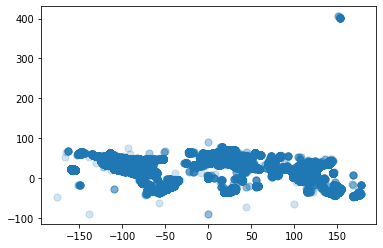

In [4]:
X= np.array(df[['longitude','latitude']],dtype='float64')
plt.scatter(X[:,0],X[:,1],alpha =0.2,s=50)

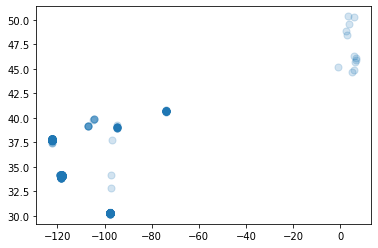

In [5]:
X= np.array(df_small[['longitude','latitude']],dtype='float64')
plt.scatter(X[:,0],X[:,1],alpha =0.2,s=50)

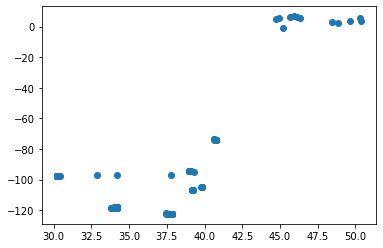

In [6]:
X = df_small['latitude']
y_true = df_small['longitude']
plt.scatter(X, y_true)
plt.show()

In [7]:
m= folium.Map(location=[df_small.latitude.mean(),df_small.longitude.mean()],zoom_start=9,
             tiles='Stamen Toner')
for _, row in df_small.iterrows():
    folium.CircleMarker(
    location=[row.latitude,row.longitude],
    radius=5,
    #popup = re.sub(r'[^a-zA-Z]+','',row.NAME),
    color='#1787FE',
    fill=True,
    fill_color='#1787FE').add_to(m)
m

## Clustering

https://medium.datadriveninvestor.com/clustering-geolocation-data-in-python-using-dbscan-and-k-means-3705d9f44522

### Kmeans clustering

In [15]:
cols = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4','#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080']*10

In [44]:
X=np.array(df_small[['longitude','latitude']],dtype='float64')
k=7
model = KMeans(n_clusters=k,random_state=17).fit(X)
class_predictions=model.predict(X)
df_small[f'CLUSTER_kmeans{k}'] = class_predictions
df_small.head()

/var/folders/vr/6vkyd9fn0156z6vrgqpnhryw0000gn/T/ipykernel_92237/2078330015.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small[f'CLUSTER_kmeans{k}'] = class_predictions


,user,checkin_time,latitude,longitude,location_id,CLUSTER_kmeans70,CLUSTER_kmeans7
0,0,2010-10-19T23:55:27Z,30.235909,-97.795140,22847,62,2
1,0,2010-10-18T22:17:43Z,30.269103,-97.749395,420315,15,2
2,0,2010-10-17T23:42:03Z,30.255731,-97.763386,316637,48,2
3,0,2010-10-17T19:26:05Z,30.263418,-97.757597,16516,15,2
4,0,2010-10-16T18:50:42Z,30.274292,-97.740523,5535878,15,2


In [41]:
def create_map(df,cluster_column):
    m = folium.Map(location=[df.latitude.mean(), df.longitude.mean()], zoom_start=9, tiles='Stamen Toner')
    for _, row in df.iterrows():
        if row[cluster_column]==-1:
            cluster_colour= '#000000'
        else:
            cluster_colour = cols[row[cluster_column]]
        folium.CircleMarker(
                    location= [row['latitude'],row['longitude']],# insert here,
                    radius=5,
                    #popup= row[cluster_column],# insert here,
                    color=cluster_colour,
                    fill=True,
                    fill_color=cluster_colour
                ).add_to(m)
    return m


m=create_map(df_small,'CLUSTER_kmeans7')
print(f'K={k}')
print(f'Silhouette Score: {silhouette_score(X, class_predictions)}')

K=7
Silhouette Score: 0.976383517190536


In [42]:
m

In [37]:
best_silhouette, best_k = -1, 0
for k in tqdm(range(2, 100)):
    model = KMeans(n_clusters=k, random_state=1).fit(X)
    class_predictions = model.predict(X)
    
    curr_silhouette = silhouette_score(X, class_predictions)
    if curr_silhouette > best_silhouette:
        best_k = k
        best_silhouette = curr_silhouette
        
print(f'K={best_k}')
print(f'Silhouette Score: {best_silhouette}')

100%|███████████████████████████████████████████| 98/98 [00:07<00:00, 12.50it/s]

K=7
Silhouette Score: 0.976383517190536


### DBScan

In [47]:
len(class_predictions)

1000

In [48]:
dummy = np.array([-1, -1, -1, 2, 3, 4, 5])
new = np.array([(counter+2)*x if x==-1 else x for counter, x in enumerate(dummy)])
model = DBSCAN(eps=0.01,min_samples=5).fit(X)
class_predictions= model.labels_
df_small['CLUSTER_DBSCAN'] = class_predictions

/var/folders/vr/6vkyd9fn0156z6vrgqpnhryw0000gn/T/ipykernel_92237/693693179.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['CLUSTER_DBSCAN'] = class_predictions


In [49]:
m = create_map(df_small,'CLUSTER_DBSCAN')
print(f'Number of clusters found: {len(np.unique(class_predictions))}')
print(f'Number of outliers found: {len(class_predictions[class_predictions==-1])}')
print(f'Silhouette ignoring outliers: {silhouette_score(X[class_predictions!=-1], class_predictions[class_predictions!=-1])}')
no_outliers = 0
no_outliers = np.array([(counter+2)*x if x==-1 else x for counter, x in enumerate(class_predictions)])
print(f'Silhouette outliers as singletons: {silhouette_score(X, no_outliers)}')

Number of clusters found: 21
Number of outliers found: 197
Silhouette ignoring outliers: 0.5968667374315827
Silhouette outliers as singletons: 0.2760881562620153


In [50]:
m

### HDBScan

In [55]:
model=hdbscan.HDBSCAN(min_cluster_size=5, min_samples=2,
                      cluster_selection_epsilon=0.01)
class_predictions=model.fit_predict(X)
df_small['CLUSTER_HDBSCAN'] = class_predictions

/var/folders/vr/6vkyd9fn0156z6vrgqpnhryw0000gn/T/ipykernel_92237/930199655.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['CLUSTER_HDBSCAN'] = class_predictions


In [56]:
m=create_map(df_small,'CLUSTER_HDBSCAN')
print(f'Number of clusters found: {len(np.unique(class_predictions))-1}')
print(f'Number of outliers found: {len(class_predictions[class_predictions==-1])}')
print(f'Silhouette ignoring outliers: {silhouette_score(X[class_predictions!=-1], class_predictions[class_predictions!=-1])}')
no_outliers = np.array([(counter+2)*x if x==-1 else x for counter, x in enumerate(class_predictions)])
print(f'Silhouette outliers as singletons: {silhouette_score(X, no_outliers)}')
m

Number of clusters found: 34
Number of outliers found: 47
Silhouette ignoring outliers: 0.5340716356108776
Silhouette outliers as singletons: 0.43410322837711357


In [60]:
df_small

,user,checkin_time,latitude,longitude,location_id,CLUSTER_kmeans70,CLUSTER_kmeans7,CLUSTER_DBSCAN,CLUSTER_HDBSCAN,CLUSTER_hybrid
0,0,2010-10-19T23:55:27Z,30.235909,-97.795140,22847,62,2,-1,13,13
1,0,2010-10-18T22:17:43Z,30.269103,-97.749395,420315,15,2,0,13,13
2,0,2010-10-17T23:42:03Z,30.255731,-97.763386,316637,48,2,0,13,13
3,0,2010-10-17T19:26:05Z,30.263418,-97.757597,16516,15,2,0,13,13
4,0,2010-10-16T18:50:42Z,30.274292,-97.740523,5535878,15,2,0,13,13
...,...,...,...,...,...,...,...,...,...,...
995,2,2010-09-06T20:53:04Z,34.143544,-118.751296,1144132,51,0,-1,17,17
996,2,2010-09-06T20:52:42Z,34.144729,-118.762571,794741,51,0,-1,17,17
997,2,2010-09-06T20:52:19Z,34.144782,-118.762849,382435,51,0,-1,17,17
998,2,2010-09-06T20:51:35Z,34.147883,-118.782541,761043,51,0,-1,17,17


### Adressing Outliers

In [61]:
classifier=KNeighborsClassifier(n_neighbors=1)
df_train=df_small[df_small.CLUSTER_HDBSCAN!=-1]
df_predict=df_small[df_small.CLUSTER_HDBSCAN ==-1]
x_train = np.array(df_train[['longitude','latitude']],dtype='float64')
y_train = np.array(df_train['CLUSTER_HDBSCAN'])
X_predict = np.array(df_predict[['longitude','latitude']],dtype='float64')
classifier.fit(x_train,y_train)
predictions = classifier.predict(X_predict)
df_small['CLUSTER_hybrid'] = df_small['CLUSTER_HDBSCAN']
df_small.loc[df_small.CLUSTER_HDBSCAN==-1,'CLUSTER_hybrid'] = predictions
m= create_map(df_small,'CLUSTER_hybrid')
m

/var/folders/vr/6vkyd9fn0156z6vrgqpnhryw0000gn/T/ipykernel_92237/891404817.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['CLUSTER_hybrid'] = df_small['CLUSTER_HDBSCAN']
/Users/brigitta/opt/miniconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


## Plotting all data (without follium map)

### Kmenas

In [62]:
X=np.array(df[['longitude','latitude']],dtype='float64')
k=70
model = KMeans(n_clusters=k,random_state=17).fit(X)
class_predictions=model.predict(X)
df[f'CLUSTER_kmeans{k}'] = class_predictions
df.head()

KeyboardInterrupt: 

Because we know the places and its geosptial data, cant we just use groupbys?

In [74]:
df_in.groupby("city").count()

,user,checkin_time,latitude,longitude,location_id,location_raw
city,,,,,,
,3,3,3,3,3,3
Austin,62,62,62,62,62,62
City of New York,27,27,27,27,27,27
Kansas City,7,7,7,7,7,7
Overland Park,1,1,1,1,1,1


In [85]:
df.groupby("location_id").size().sort_values(ascending=False)

location_id
55033      5811
19542      5662
9410       4713
10259      4083
58725      3476
           ... 
1071645       1
1071647       1
1071650       1
1071652       1
5977757       1
Length: 1280969, dtype: int64

Now need to add the cities to the data (cry)